In [253]:
import json
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec

In [254]:
import matplotlib.pyplot as plt, seaborn as sns

In [255]:
df1 = pd.read_json(r'C:\Users\Aarajula\Downloads\pokedex.json')

In [256]:
df1

,pokemon
0,"{'id': 1, 'num': '001', 'name': 'Bulbasaur', '..."
1,"{'id': 2, 'num': '002', 'name': 'Ivysaur', 'im..."
2,"{'id': 3, 'num': '003', 'name': 'Venusaur', 'i..."
3,"{'id': 4, 'num': '004', 'name': 'Charmander', ..."
4,"{'id': 5, 'num': '005', 'name': 'Charmeleon', ..."
...,...
146,"{'id': 147, 'num': '147', 'name': 'Dratini', '..."
147,"{'id': 148, 'num': '148', 'name': 'Dragonair',..."
148,"{'id': 149, 'num': '149', 'name': 'Dragonite',..."
149,"{'id': 150, 'num': '150', 'name': 'Mewtwo', 'i..."


In [257]:
df2 = pd.read_csv(r'C:\Users\Aarajula\Downloads\pokemon.csv')

In [258]:
df2['id'] = df2.reset_index().index

In [259]:
df2

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,1
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,2
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,797,107,101,61,steel,flying,999.9,7,1,796
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,798,59,31,109,grass,steel,0.1,7,1,797
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,799,97,53,43,dark,dragon,888.0,7,1,798
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,800,127,89,79,psychic,NaN,230.0,7,1,799


In [260]:
try:
    pokeDexjsonStr = open(r'C:\Users\Aarajula\Downloads\pokedex.json')
except (FileNotFoundError):
    print('Please check if the file name is correct or if the file exist in first place')
else:
    pokeDexjson = json.load(pokeDexjsonStr)
    print(type(pokeDexjson))
    

<class 'dict'>


In [261]:
import pprint
from pprint import pprint
pprint(pokeDexjson)

{'pokemon': [{'avg_spawns': 69,
              'candy': 'Bulbasaur Candy',
              'candy_count': 25,
              'egg': '2 km',
              'height': '0.71 m',
              'id': 1,
              'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
              'multipliers': [1.58],
              'name': 'Bulbasaur',
              'next_evolution': [{'name': 'Ivysaur', 'num': '002'},
                                 {'name': 'Venusaur', 'num': '003'}],
              'num': '001',
              'spawn_chance': 0.69,
              'spawn_time': '20:00',
              'type': ['Grass', 'Poison'],
              'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
              'weight': '6.9 kg'},
             {'avg_spawns': 4.2,
              'candy': 'Bulbasaur Candy',
              'candy_count': 100,
              'egg': 'Not in Eggs',
              'height': '0.99 m',
              'id': 2,
              'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
    

In [262]:
pokeDex =pd.json_normalize(pokeDexjson, record_path = ['pokemon'])
pokeDex

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


## Merging:-

In [263]:
Data = pd.merge(pokeDex, df2, on='name', how='right')

In [264]:
Data

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,1,65,65,45,grass,poison,6.9,1,0,0
1,2.0,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,2,80,80,60,grass,poison,13.0,1,0,1
2,3.0,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
3,4.0,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,NaN,NaN,Celesteela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,797,107,101,61,steel,flying,999.9,7,1,796
797,NaN,NaN,Kartana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,798,59,31,109,grass,steel,0.1,7,1,797
798,NaN,NaN,Guzzlord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,799,97,53,43,dark,dragon,888.0,7,1,798
799,NaN,NaN,Necrozma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,800,127,89,79,psychic,NaN,230.0,7,1,799


## filtering the data to 151 rows

In [265]:
Data['num'] = pd.to_numeric(Data['num'], errors='coerce')
df = Data[Data['num'] <= 151]

In [266]:
df

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,1,65,65,45,grass,poison,6.9,1,0,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,2,80,80,60,grass,poison,13.0,1,0,1
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,147,50,50,50,dragon,NaN,3.3,1,0,146
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,148,70,70,70,dragon,NaN,16.5,1,0,147
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [267]:
data = df.copy()

In [268]:
data

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,1,65,65,45,grass,poison,6.9,1,0,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,2,80,80,60,grass,poison,13.0,1,0,1
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,147,50,50,50,dragon,NaN,3.3,1,0,146
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,148,70,70,70,dragon,NaN,16.5,1,0,147
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


## finding null values

In [269]:
data.isnull().sum()

id_x                  0
num                   0
name                  0
img                   0
type                  0
height                0
weight                0
candy                 0
candy_count          81
egg                   0
spawn_chance          0
avg_spawns            0
spawn_time            0
multipliers          81
weaknesses            0
next_evolution       81
prev_evolution       77
abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication   

## imputing on next evolution:-
- i filled all the next evolution datat with '0' as the data says that the missing values are present in the final evolution

In [270]:
missing_values_num = data['next_evolution'].isnull().sum()
missing_values_num

81

In [271]:
data[data['next_evolution'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
5,6.0,6.0,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,...,6,159,115,100,fire,flying,90.5,1,0,5
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,...,9,135,115,78,water,NaN,85.5,1,0,8
11,12.0,12.0,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,...,12,90,80,70,bug,flying,32.0,1,0,11
14,15.0,15.0,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,...,15,15,80,145,bug,poison,29.5,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,...,145,125,90,100,electric,flying,52.6,1,1,144
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,...,146,125,85,90,fire,flying,60.0,1,1,145
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [272]:
data['next_evolution'] = data['next_evolution'].fillna(value='None')


## prev_evolution:-
- on the basis of data i filled every value with '0' as there is no pr evolution for the level1 pokemons

In [273]:
data[data['prev_evolution'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,1,65,65,45,grass,poison,6.9,1,0,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
6,7.0,7.0,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,...,7,50,64,43,water,NaN,9.0,1,0,6
9,10.0,10.0,Caterpie,http://www.serebii.net/pokemongo/pokemon/010.png,[Bug],0.30 m,2.9 kg,Caterpie Candy,12.0,2 km,...,10,20,20,45,bug,NaN,2.9,1,0,9
12,13.0,13.0,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"[Bug, Poison]",0.30 m,3.2 kg,Weedle Candy,12.0,2 km,...,13,20,20,50,bug,poison,3.2,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,...,145,125,90,100,electric,flying,52.6,1,1,144
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,...,146,125,85,90,fire,flying,60.0,1,1,145
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,147,50,50,50,dragon,NaN,3.3,1,0,146
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [274]:
data['prev_evolution'].fillna(value = 'None')

0                                                   None
1                  [{'num': '001', 'name': 'Bulbasaur'}]
2      [{'num': '001', 'name': 'Bulbasaur'}, {'num': ...
3                                                   None
4                 [{'num': '004', 'name': 'Charmander'}]
                             ...                        
146                                                 None
147                  [{'num': '147', 'name': 'Dratini'}]
148    [{'num': '147', 'name': 'Dratini'}, {'num': '1...
149                                                 None
150                                                 None
Name: prev_evolution, Length: 149, dtype: object

## candy_count:-


In [275]:
data[data['candy_count'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
5,6.0,6.0,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,...,6,159,115,100,fire,flying,90.5,1,0,5
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,...,9,135,115,78,water,NaN,85.5,1,0,8
11,12.0,12.0,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,...,12,90,80,70,bug,flying,32.0,1,0,11
14,15.0,15.0,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,...,15,15,80,145,bug,poison,29.5,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,...,145,125,90,100,electric,flying,52.6,1,1,144
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,...,146,125,85,90,fire,flying,60.0,1,1,145
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [276]:
data['candy_count'].fillna(0, inplace=True)

##  multipliers:-

In [277]:
data[data['multipliers'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
5,6.0,6.0,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,0.0,Not in Eggs,...,6,159,115,100,fire,flying,90.5,1,0,5
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,0.0,Not in Eggs,...,9,135,115,78,water,NaN,85.5,1,0,8
11,12.0,12.0,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,0.0,Not in Eggs,...,12,90,80,70,bug,flying,32.0,1,0,11
14,15.0,15.0,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,0.0,Not in Eggs,...,15,15,80,145,bug,poison,29.5,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,0.0,Not in Eggs,...,145,125,90,100,electric,flying,52.6,1,1,144
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,0.0,Not in Eggs,...,146,125,85,90,fire,flying,60.0,1,1,145
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [278]:
data['multipliers'].fillna(value = 'None')

0            [1.58]
1        [1.2, 1.6]
2              None
3            [1.65]
4            [1.79]
           ...     
146    [1.83, 1.84]
147          [2.05]
148            None
149            None
150            None
Name: multipliers, Length: 149, dtype: object

## droping:- type

In [279]:
data.drop('type', axis=1)

,id_x,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,...,1,65,65,45,grass,poison,6.9,1,0,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,...,2,80,80,60,grass,poison,13.0,1,0,1
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,0.0170,...,3,122,120,80,grass,poison,100.0,1,0,2
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,...,147,50,50,50,dragon,NaN,3.3,1,0,146
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,...,148,70,70,70,dragon,NaN,16.5,1,0,147
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,0.0011,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,2.01 m,122.0 kg,None,0.0,Not in Eggs,0.0000,...,150,194,120,140,psychic,NaN,122.0,1,1,149


## filling type 2:-
-  based on the data present in type1 we are filling the type2

In [280]:
data[data['type2'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,5,80,65,80,fire,NaN,19.0,1,0,4
6,7.0,7.0,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,...,7,50,64,43,water,NaN,9.0,1,0,6
7,8.0,8.0,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,[Water],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,...,8,65,80,58,water,NaN,22.5,1,0,7
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,0.0,Not in Eggs,...,9,135,115,78,water,NaN,85.5,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,143.0,Snorlax,http://www.serebii.net/pokemongo/pokemon/143.png,[Normal],2.11 m,460.0 kg,None,0.0,10 km,...,143,65,110,30,normal,NaN,460.0,1,0,142
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,147,50,50,50,dragon,NaN,3.3,1,0,146
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,148,70,70,70,dragon,NaN,16.5,1,0,147
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [281]:
data['type2'].fillna(data['type1'], inplace=True)

In [282]:
data['percentage_male'].isnull().sum()

13

## droping weight_kg, height_m:-

In [283]:
data[data['weight_kg'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
18,19.0,19.0,Rattata,http://www.serebii.net/pokemongo/pokemon/019.png,[Normal],0.30 m,3.5 kg,Rattata Candy,25.0,2 km,...,19,25,35,72,normal,dark,NaN,1,0,18
19,20.0,20.0,Raticate,http://www.serebii.net/pokemongo/pokemon/020.png,[Normal],0.71 m,18.5 kg,Rattata Candy,0.0,Not in Eggs,...,20,40,80,77,normal,dark,NaN,1,0,19
25,26.0,26.0,Raichu,http://www.serebii.net/pokemongo/pokemon/026.png,[Electric],0.79 m,30.0 kg,Pikachu Candy,0.0,Not in Eggs,...,26,95,85,110,electric,electric,NaN,1,0,25
26,27.0,27.0,Sandshrew,http://www.serebii.net/pokemongo/pokemon/027.png,[Ground],0.61 m,12.0 kg,Sandshrew Candy,50.0,5 km,...,27,10,35,40,ground,ice,NaN,1,0,26
27,28.0,28.0,Sandslash,http://www.serebii.net/pokemongo/pokemon/028.png,[Ground],0.99 m,29.5 kg,Sandshrew Candy,0.0,Not in Eggs,...,28,25,65,65,ground,ice,NaN,1,0,27
36,37.0,37.0,Vulpix,http://www.serebii.net/pokemongo/pokemon/037.png,[Fire],0.61 m,9.9 kg,Vulpix Candy,50.0,5 km,...,37,50,65,65,fire,ice,NaN,1,0,36
37,38.0,38.0,Ninetales,http://www.serebii.net/pokemongo/pokemon/038.png,[Fire],1.09 m,19.9 kg,Vulpix Candy,0.0,Not in Eggs,...,38,81,100,109,fire,ice,NaN,1,0,37
49,50.0,50.0,Diglett,http://www.serebii.net/pokemongo/pokemon/050.png,[Ground],0.20 m,0.8 kg,Diglett Candy,50.0,5 km,...,50,35,45,90,ground,ground,NaN,1,0,49
50,51.0,51.0,Dugtrio,http://www.serebii.net/pokemongo/pokemon/051.png,[Ground],0.71 m,33.3 kg,Dugtrio,0.0,Not in Eggs,...,51,50,70,110,ground,ground,NaN,1,0,50
51,52.0,52.0,Meowth,http://www.serebii.net/pokemongo/pokemon/052.png,[Normal],0.41 m,4.2 kg,Meowth Candy,50.0,5 km,...,52,50,40,90,normal,dark,NaN,1,0,51


In [284]:
data[['weight','weight_kg']]

,weight,weight_kg
0,6.9 kg,6.9
1,13.0 kg,13.0
2,100.0 kg,100.0
3,8.5 kg,8.5
4,19.0 kg,19.0
...,...,...
146,3.3 kg,3.3
147,16.5 kg,16.5
148,210.0 kg,210.0
149,122.0 kg,122.0


In [285]:
data[['height','height_m']]

,height,height_m
0,0.71 m,0.7
1,0.99 m,1.0
2,2.01 m,2.0
3,0.61 m,0.6
4,1.09 m,1.1
...,...,...
146,1.80 m,1.8
147,3.99 m,4.0
148,2.21 m,2.2
149,2.01 m,2.0


In [286]:
data.drop('height_m', axis=1, inplace=True)

In [287]:
data.drop('weight_kg', axis=1, inplace=True)

##  percentage_male:-

In [288]:
missing_percentage_male_rows = data[data["percentage_male"].isna()]
unique_types = missing_percentage_male_rows["type1"].unique()
print("Unique Types with Missing 'percentage_male':", unique_types)


Unique Types with Missing 'percentage_male': ['electric' 'water' 'normal' 'ice' 'fire' 'psychic']


In [289]:
data[data["percentage_male"].isna()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,id_y
80,81.0,81.0,Magnemite,http://www.serebii.net/pokemongo/pokemon/081.png,[Electric],0.30 m,6.0 kg,Magnemite Candy,50.0,5 km,...,NaN,81,95,55,45,electric,steel,1,0,80
81,82.0,82.0,Magneton,http://www.serebii.net/pokemongo/pokemon/082.png,[Electric],0.99 m,60.0 kg,Magnemite Candy,0.0,Not in Eggs,...,NaN,82,120,70,70,electric,steel,1,0,81
99,100.0,100.0,Voltorb,http://www.serebii.net/pokemongo/pokemon/100.png,[Electric],0.51 m,10.4 kg,Voltorb Candy,50.0,5 km,...,NaN,100,55,55,100,electric,electric,1,0,99
100,101.0,101.0,Electrode,http://www.serebii.net/pokemongo/pokemon/101.png,[Electric],1.19 m,66.6 kg,Voltorb Candy,0.0,Not in Eggs,...,NaN,101,80,80,150,electric,electric,1,0,100
119,120.0,120.0,Staryu,http://www.serebii.net/pokemongo/pokemon/120.png,[Water],0.79 m,34.5 kg,Staryu Candy,50.0,5 km,...,NaN,120,70,55,85,water,water,1,0,119
120,121.0,121.0,Starmie,http://www.serebii.net/pokemongo/pokemon/121.png,"[Water, Psychic]",1.09 m,80.0 kg,Staryu Candy,0.0,Not in Eggs,...,NaN,121,100,85,115,water,psychic,1,0,120
131,132.0,132.0,Ditto,http://www.serebii.net/pokemongo/pokemon/132.png,[Normal],0.30 m,4.0 kg,None,0.0,Not in Eggs,...,NaN,132,48,48,48,normal,normal,1,0,131
136,137.0,137.0,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,[Normal],0.79 m,36.5 kg,None,0.0,5 km,...,NaN,137,85,75,40,normal,normal,1,0,136
143,144.0,144.0,Articuno,http://www.serebii.net/pokemongo/pokemon/144.png,"[Ice, Flying]",1.70 m,55.4 kg,None,0.0,Not in Eggs,...,NaN,144,95,125,85,ice,flying,1,1,143
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,0.0,Not in Eggs,...,NaN,145,125,90,100,electric,flying,1,1,144


In [290]:
data.loc[data["type1"] == "electric", "percentage_male"] = data.loc[data["type1"] == "electric", "percentage_male"].fillna(data.loc[data["type1"] == "electric", "percentage_male"].mode()[0])


In [291]:
data[data["type1"]=="electric"]["percentage_male"].isnull().sum()

0

In [292]:
data['percentage_male'].isnull().sum()

8

In [293]:
data.loc[data["type1"] == "water", "percentage_male"] = data.loc[data["type1"] == "water", "percentage_male"].fillna(data.loc[data["type1"] == "water", "percentage_male"].mode()[0])


In [294]:
data[data["type1"]=="water"]["percentage_male"].isnull().sum()

0

In [295]:
data['percentage_male'].isnull().sum()

6

In [296]:
data.loc[data["type1"] == "normal", "percentage_male"] = data.loc[data["type1"] == "normal", "percentage_male"].fillna(data.loc[data["type1"] == "normal", "percentage_male"].mode()[0])


In [297]:
data[data["type1"]=="normal"]["percentage_male"].isnull().sum()

0

In [298]:
data.loc[data["type1"] == "ice", "percentage_male"] = data.loc[data["type1"] == "ice", "percentage_male"].fillna(data.loc[data["type1"] == "ice", "percentage_male"].mode()[0])


In [299]:
data[data["type1"]=="ice"]["percentage_male"].isnull().sum()

0

In [300]:
data.loc[data["type1"] == "fire", "percentage_male"] = data.loc[data["type1"] == "fire", "percentage_male"].fillna(data.loc[data["type1"] == "fire", "percentage_male"].mode()[0])


In [301]:
data[data["type1"]=="fire"]["percentage_male"].isnull().sum()

0

In [302]:
data.loc[data["type1"] == "psychic", "percentage_male"] = data.loc[data["type1"] == "psychic", "percentage_male"].fillna(data.loc[data["type1"] == "psychic", "percentage_male"].mode()[0])


In [303]:
data[data["type1"]=="psychic"]["percentage_male"].isnull().sum()

0

# Data Visulaization with respect to univarien and bie varient and mutlivarient

In [304]:
pokemon = data.copy()

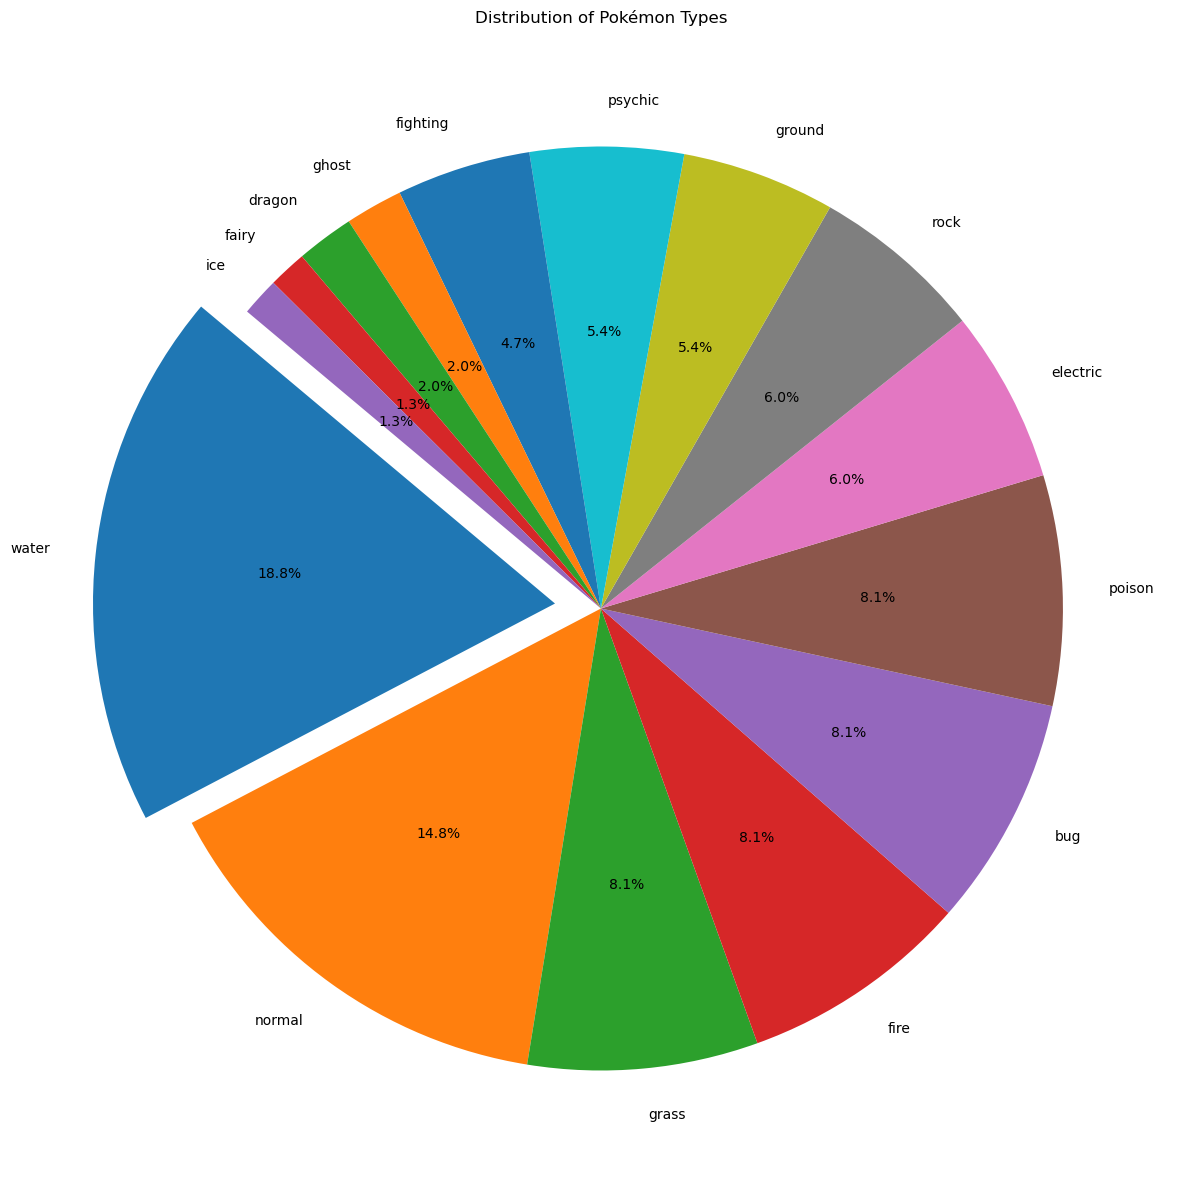

In [305]:

types_count = pokemon['type1'].value_counts()

explode = (0.1,) + (0,) * (len(types_count) - 1)

plt.figure(figsize=(15, 15))
plt.pie(types_count, labels=types_count.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Pokémon Types')
plt.show()


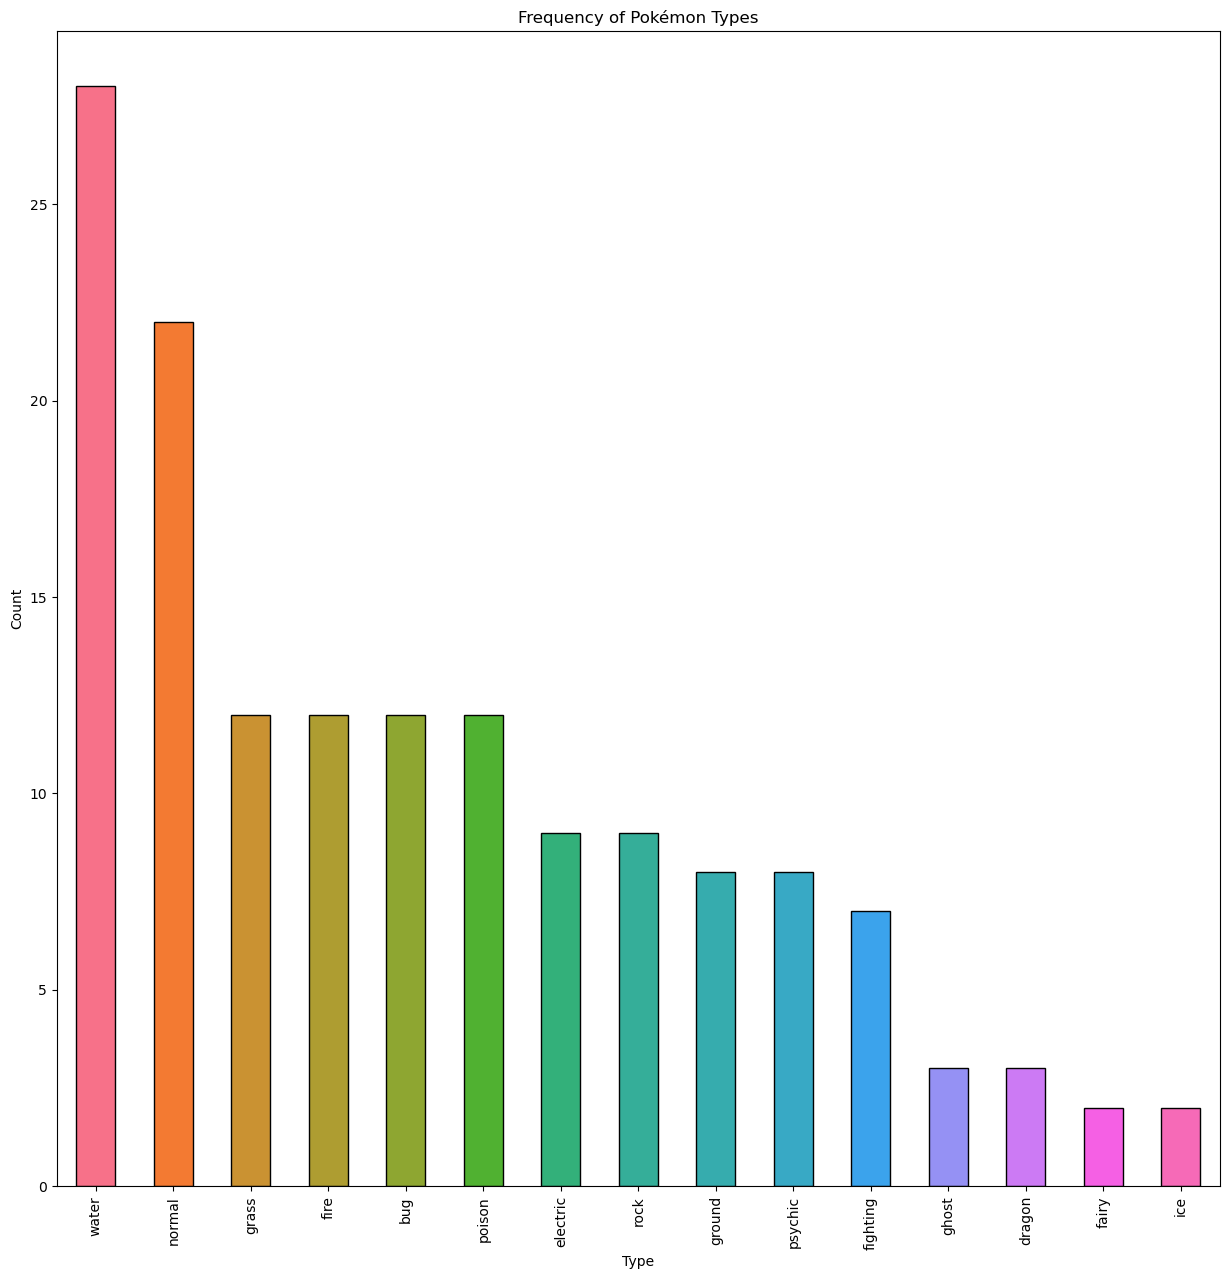

In [307]:

species_counts = pokemon['type1'].value_counts()
num_colors = len(species_counts)
random_colors = sns.color_palette("husl", n_colors=num_colors)
plt.figure(figsize=(15, 15))
species_counts.plot(kind='bar', color=random_colors, edgecolor='black')

plt.title('Frequency of Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()


# Heatmap

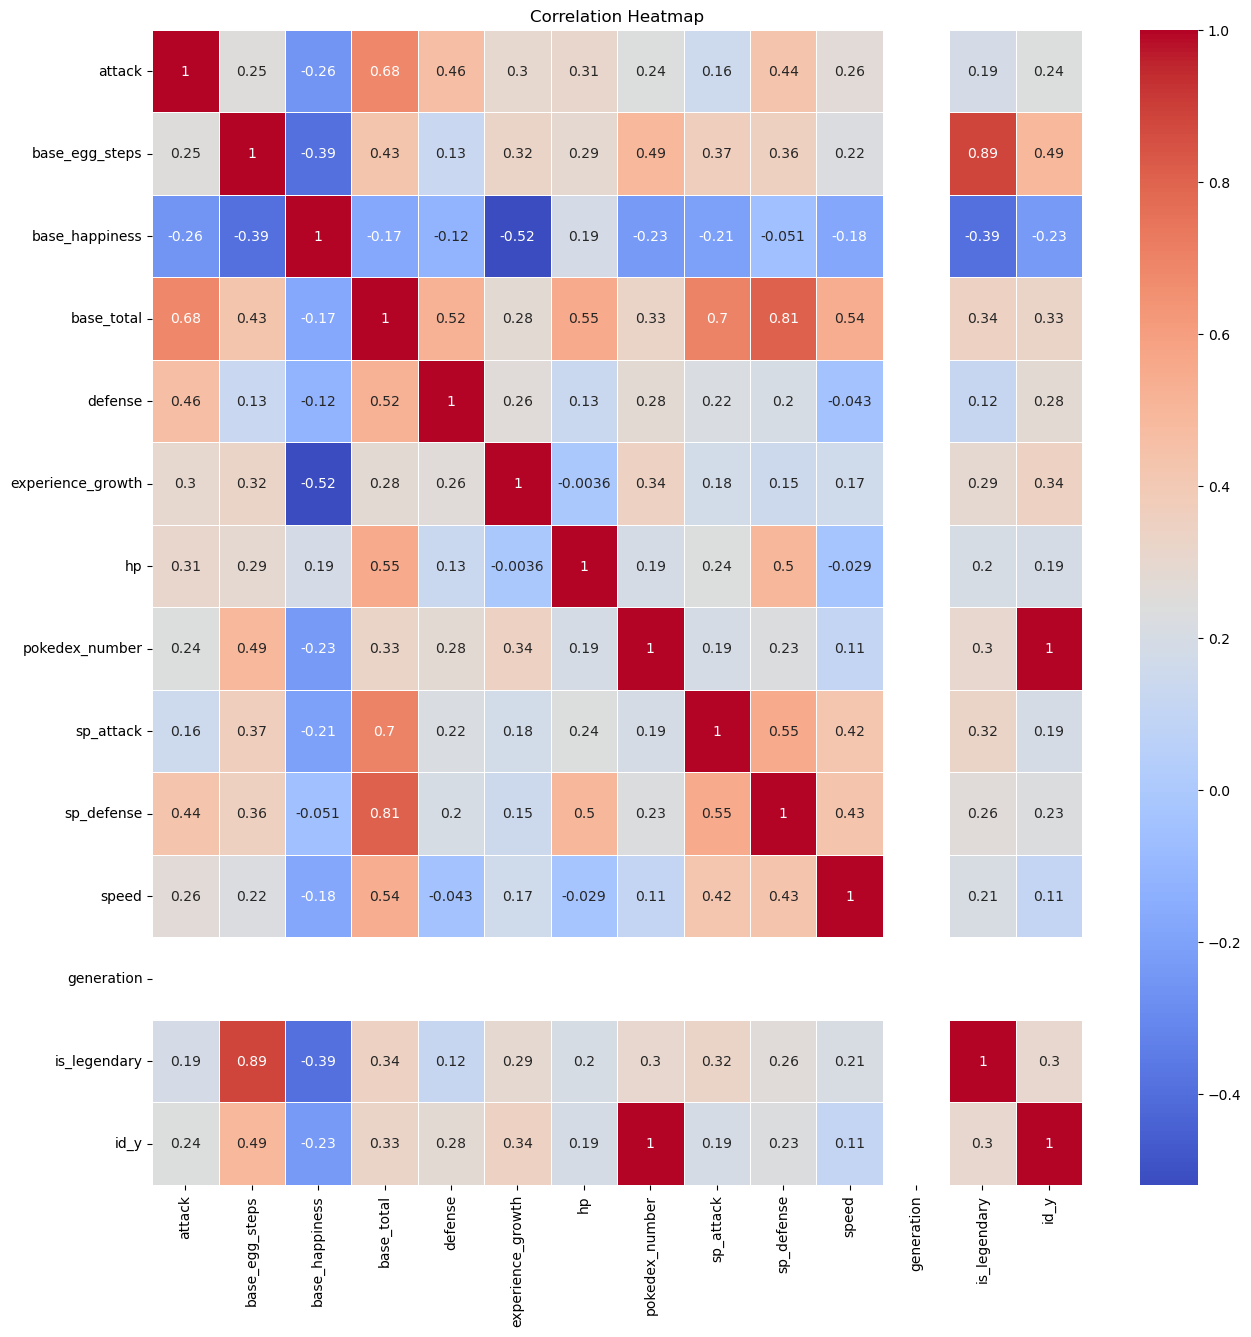

In [308]:

plt.figure(figsize=(15, 15))
numeric_columns = data.select_dtypes(include= 'int64').columns
numeric_data = pokemon[numeric_columns]

correlation_matrix = pokemon[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

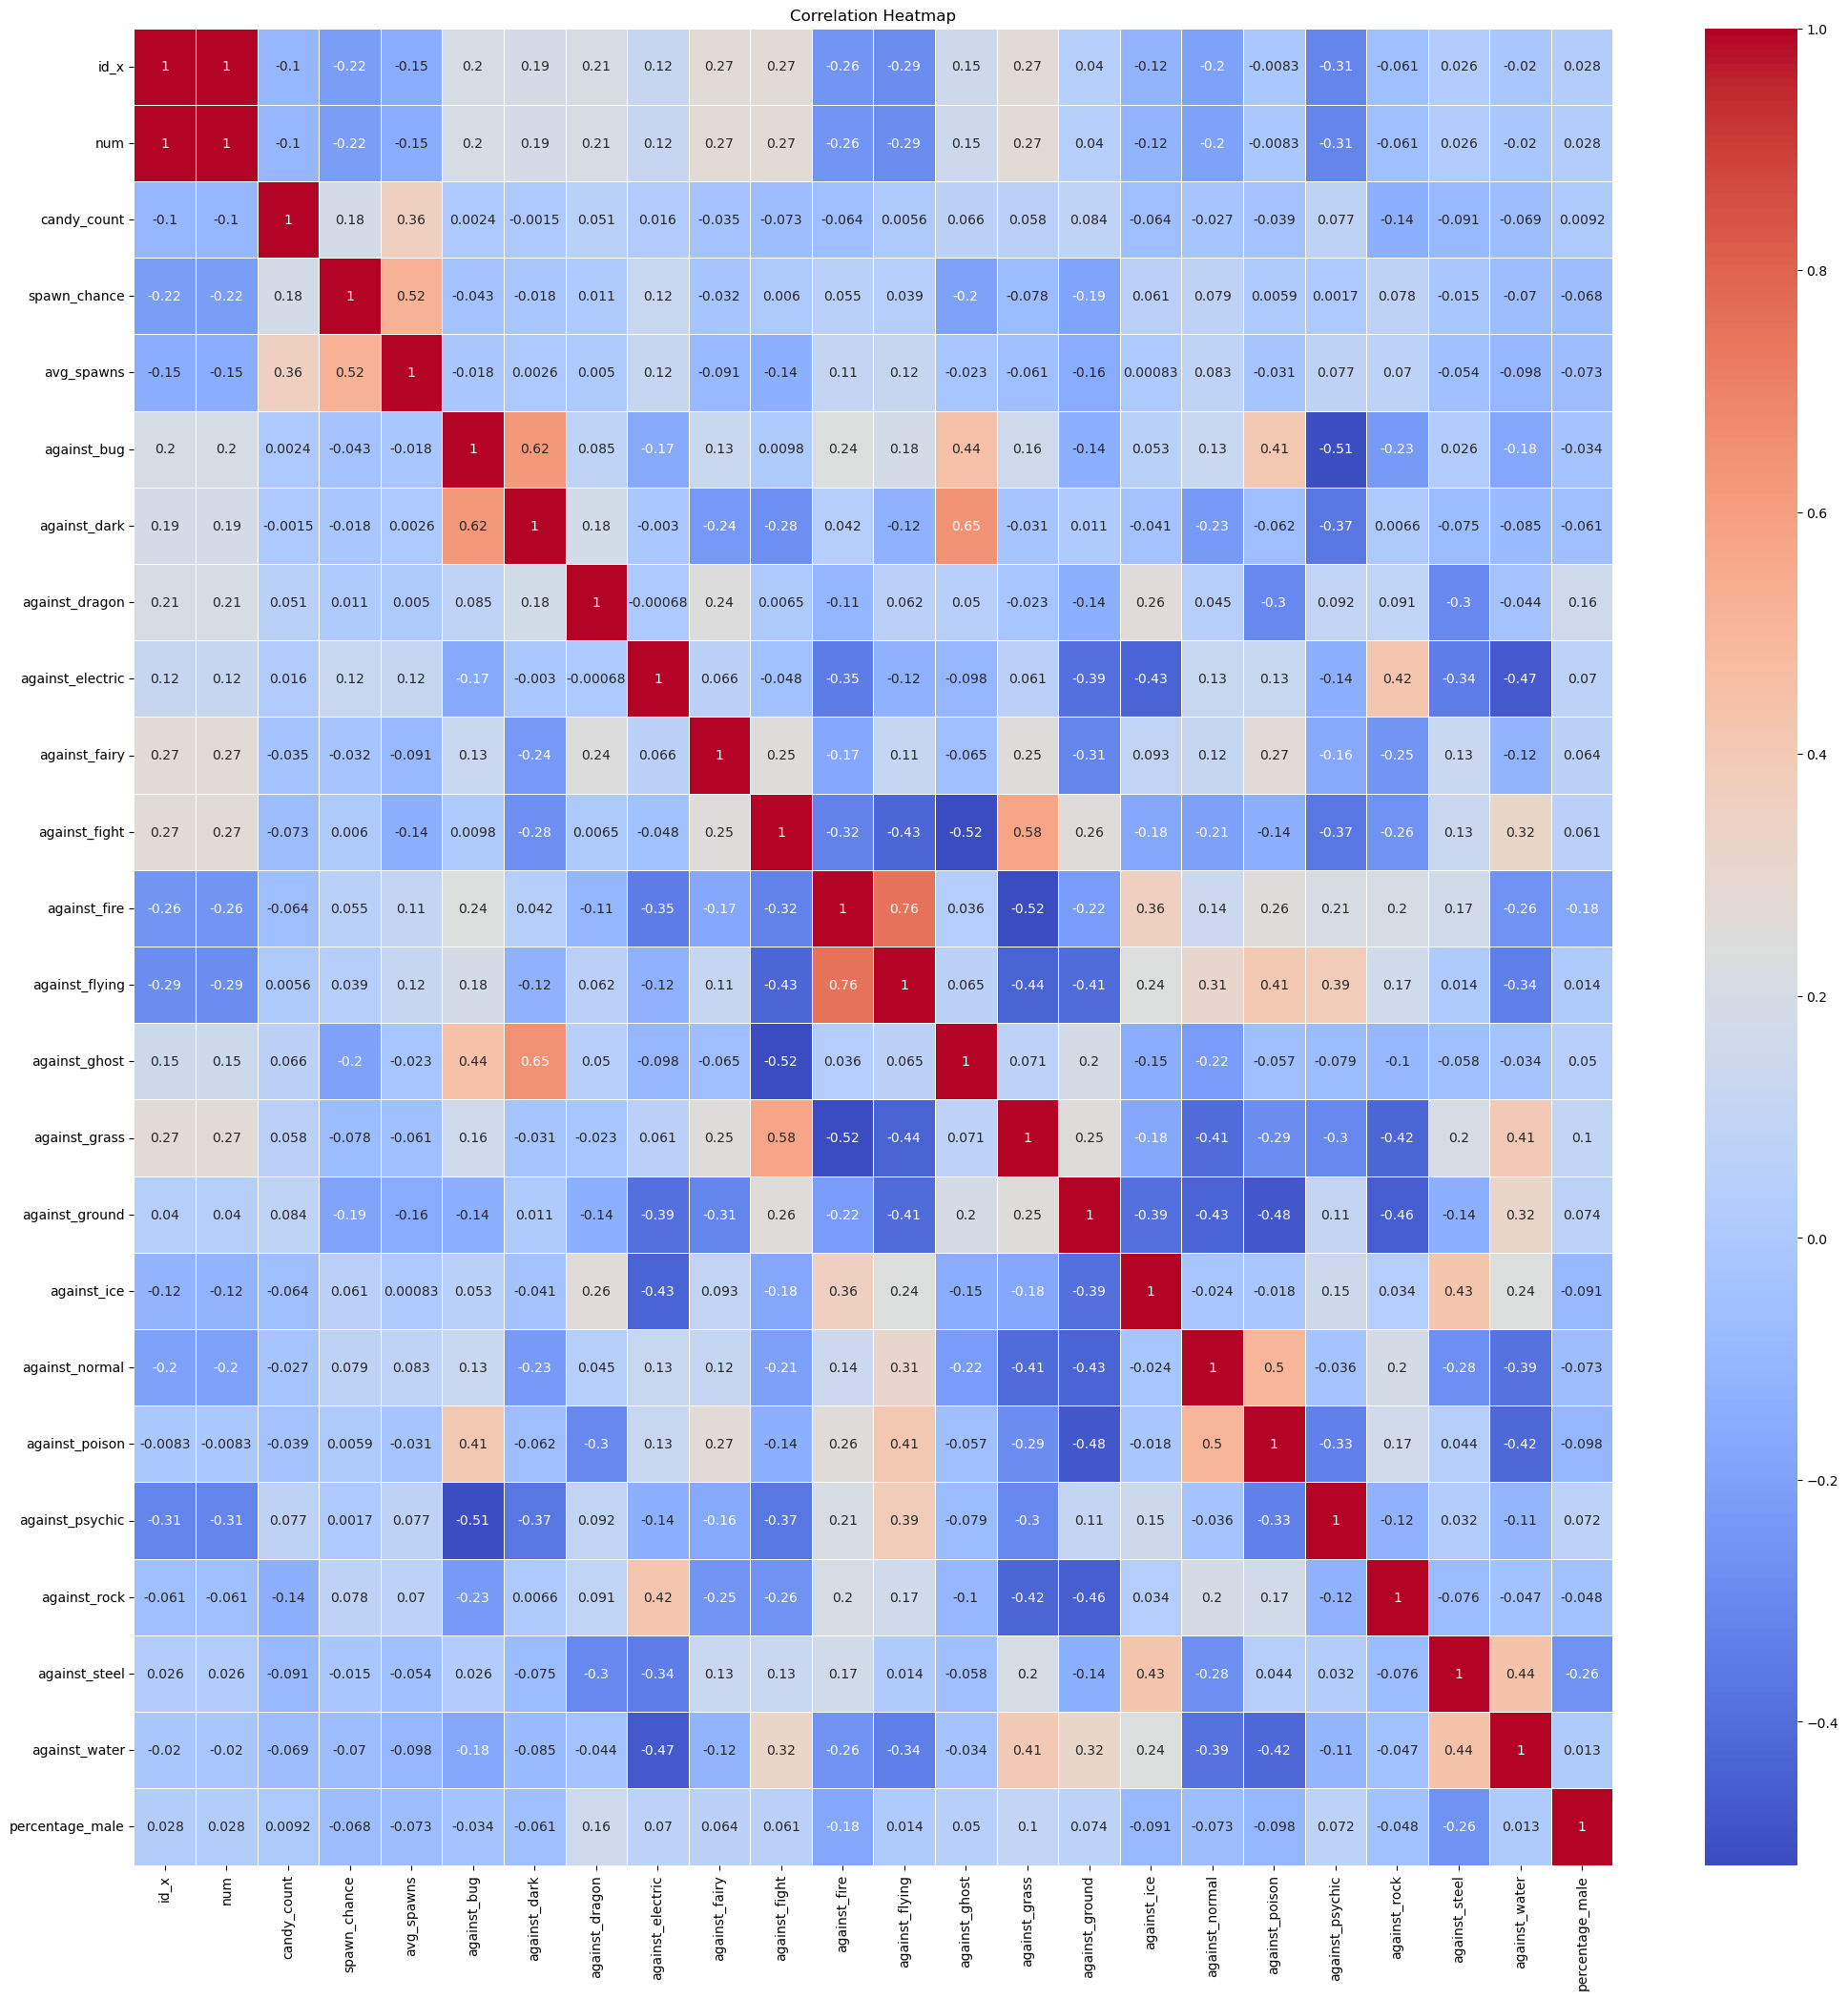

In [309]:
plt.figure(figsize=(25, 25))
numeric_columns = data.select_dtypes(include= 'float64').columns
numeric_data = pokemon[numeric_columns]
correlation_matrix = pokemon[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [655]:
type1_grouped_unique = pokemon.groupby('type1')

In [656]:
grass = type1_grouped_unique.get_group('grass')
grass

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,1,0,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,1,0,1
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,1,0,2
42,43.0,43.0,Oddish,http://www.serebii.net/pokemongo/pokemon/043.png,"[Grass, Poison]",0.51 m,5.4 kg,Oddish Candy,25.0,5 km,...,50.0,43,75,65,30,grass,poison,1,0,42
43,44.0,44.0,Gloom,http://www.serebii.net/pokemongo/pokemon/044.png,"[Grass, Poison]",0.79 m,8.6 kg,Oddish Candy,100.0,Not in Eggs,...,50.0,44,85,75,40,grass,poison,1,0,43
44,45.0,45.0,Vileplume,http://www.serebii.net/pokemongo/pokemon/045.png,"[Grass, Poison]",1.19 m,18.6 kg,Oddish Candy,0.0,Not in Eggs,...,50.0,45,110,90,50,grass,poison,1,0,44
68,69.0,69.0,Bellsprout,http://www.serebii.net/pokemongo/pokemon/069.png,"[Grass, Poison]",0.71 m,4.0 kg,Bellsprout Candy,25.0,5 km,...,50.0,69,70,30,40,grass,poison,1,0,68
69,70.0,70.0,Weepinbell,http://www.serebii.net/pokemongo/pokemon/070.png,"[Grass, Poison]",0.99 m,6.4 kg,Bellsprout Candy,100.0,Not in Eggs,...,50.0,70,85,45,55,grass,poison,1,0,69
70,71.0,71.0,Victreebel,http://www.serebii.net/pokemongo/pokemon/071.png,"[Grass, Poison]",1.70 m,15.5 kg,Bellsprout Candy,0.0,Not in Eggs,...,50.0,71,100,70,70,grass,poison,1,0,70
101,102.0,102.0,Exeggcute,http://www.serebii.net/pokemongo/pokemon/102.png,"[Grass, Psychic]",0.41 m,2.5 kg,Exeggcute Candy,50.0,5 km,...,50.0,102,60,45,40,grass,psychic,1,0,101


In [657]:
pokemon['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon'], dtype=object)

In [658]:
fire = type1_grouped_unique.get_group('fire')


In [659]:
water = type1_grouped_unique.get_group('water')

In [660]:
bug = type1_grouped_unique.get_group('bug')

In [661]:
normal = type1_grouped_unique.get_group('normal')

In [662]:
poison = type1_grouped_unique.get_group('poison')

In [663]:
electric = type1_grouped_unique.get_group('electric')

In [664]:
ground = type1_grouped_unique.get_group('ground')

In [665]:
fairy = type1_grouped_unique.get_group('fairy')

In [666]:
fighting = type1_grouped_unique.get_group('fighting')

In [667]:
psychic = type1_grouped_unique.get_group('psychic')

In [668]:
rock = type1_grouped_unique.get_group('rock')

In [669]:
ghost = type1_grouped_unique.get_group('ghost')

In [670]:
ice = type1_grouped_unique.get_group('ice')

In [671]:
dragon = type1_grouped_unique.get_group('dragon')

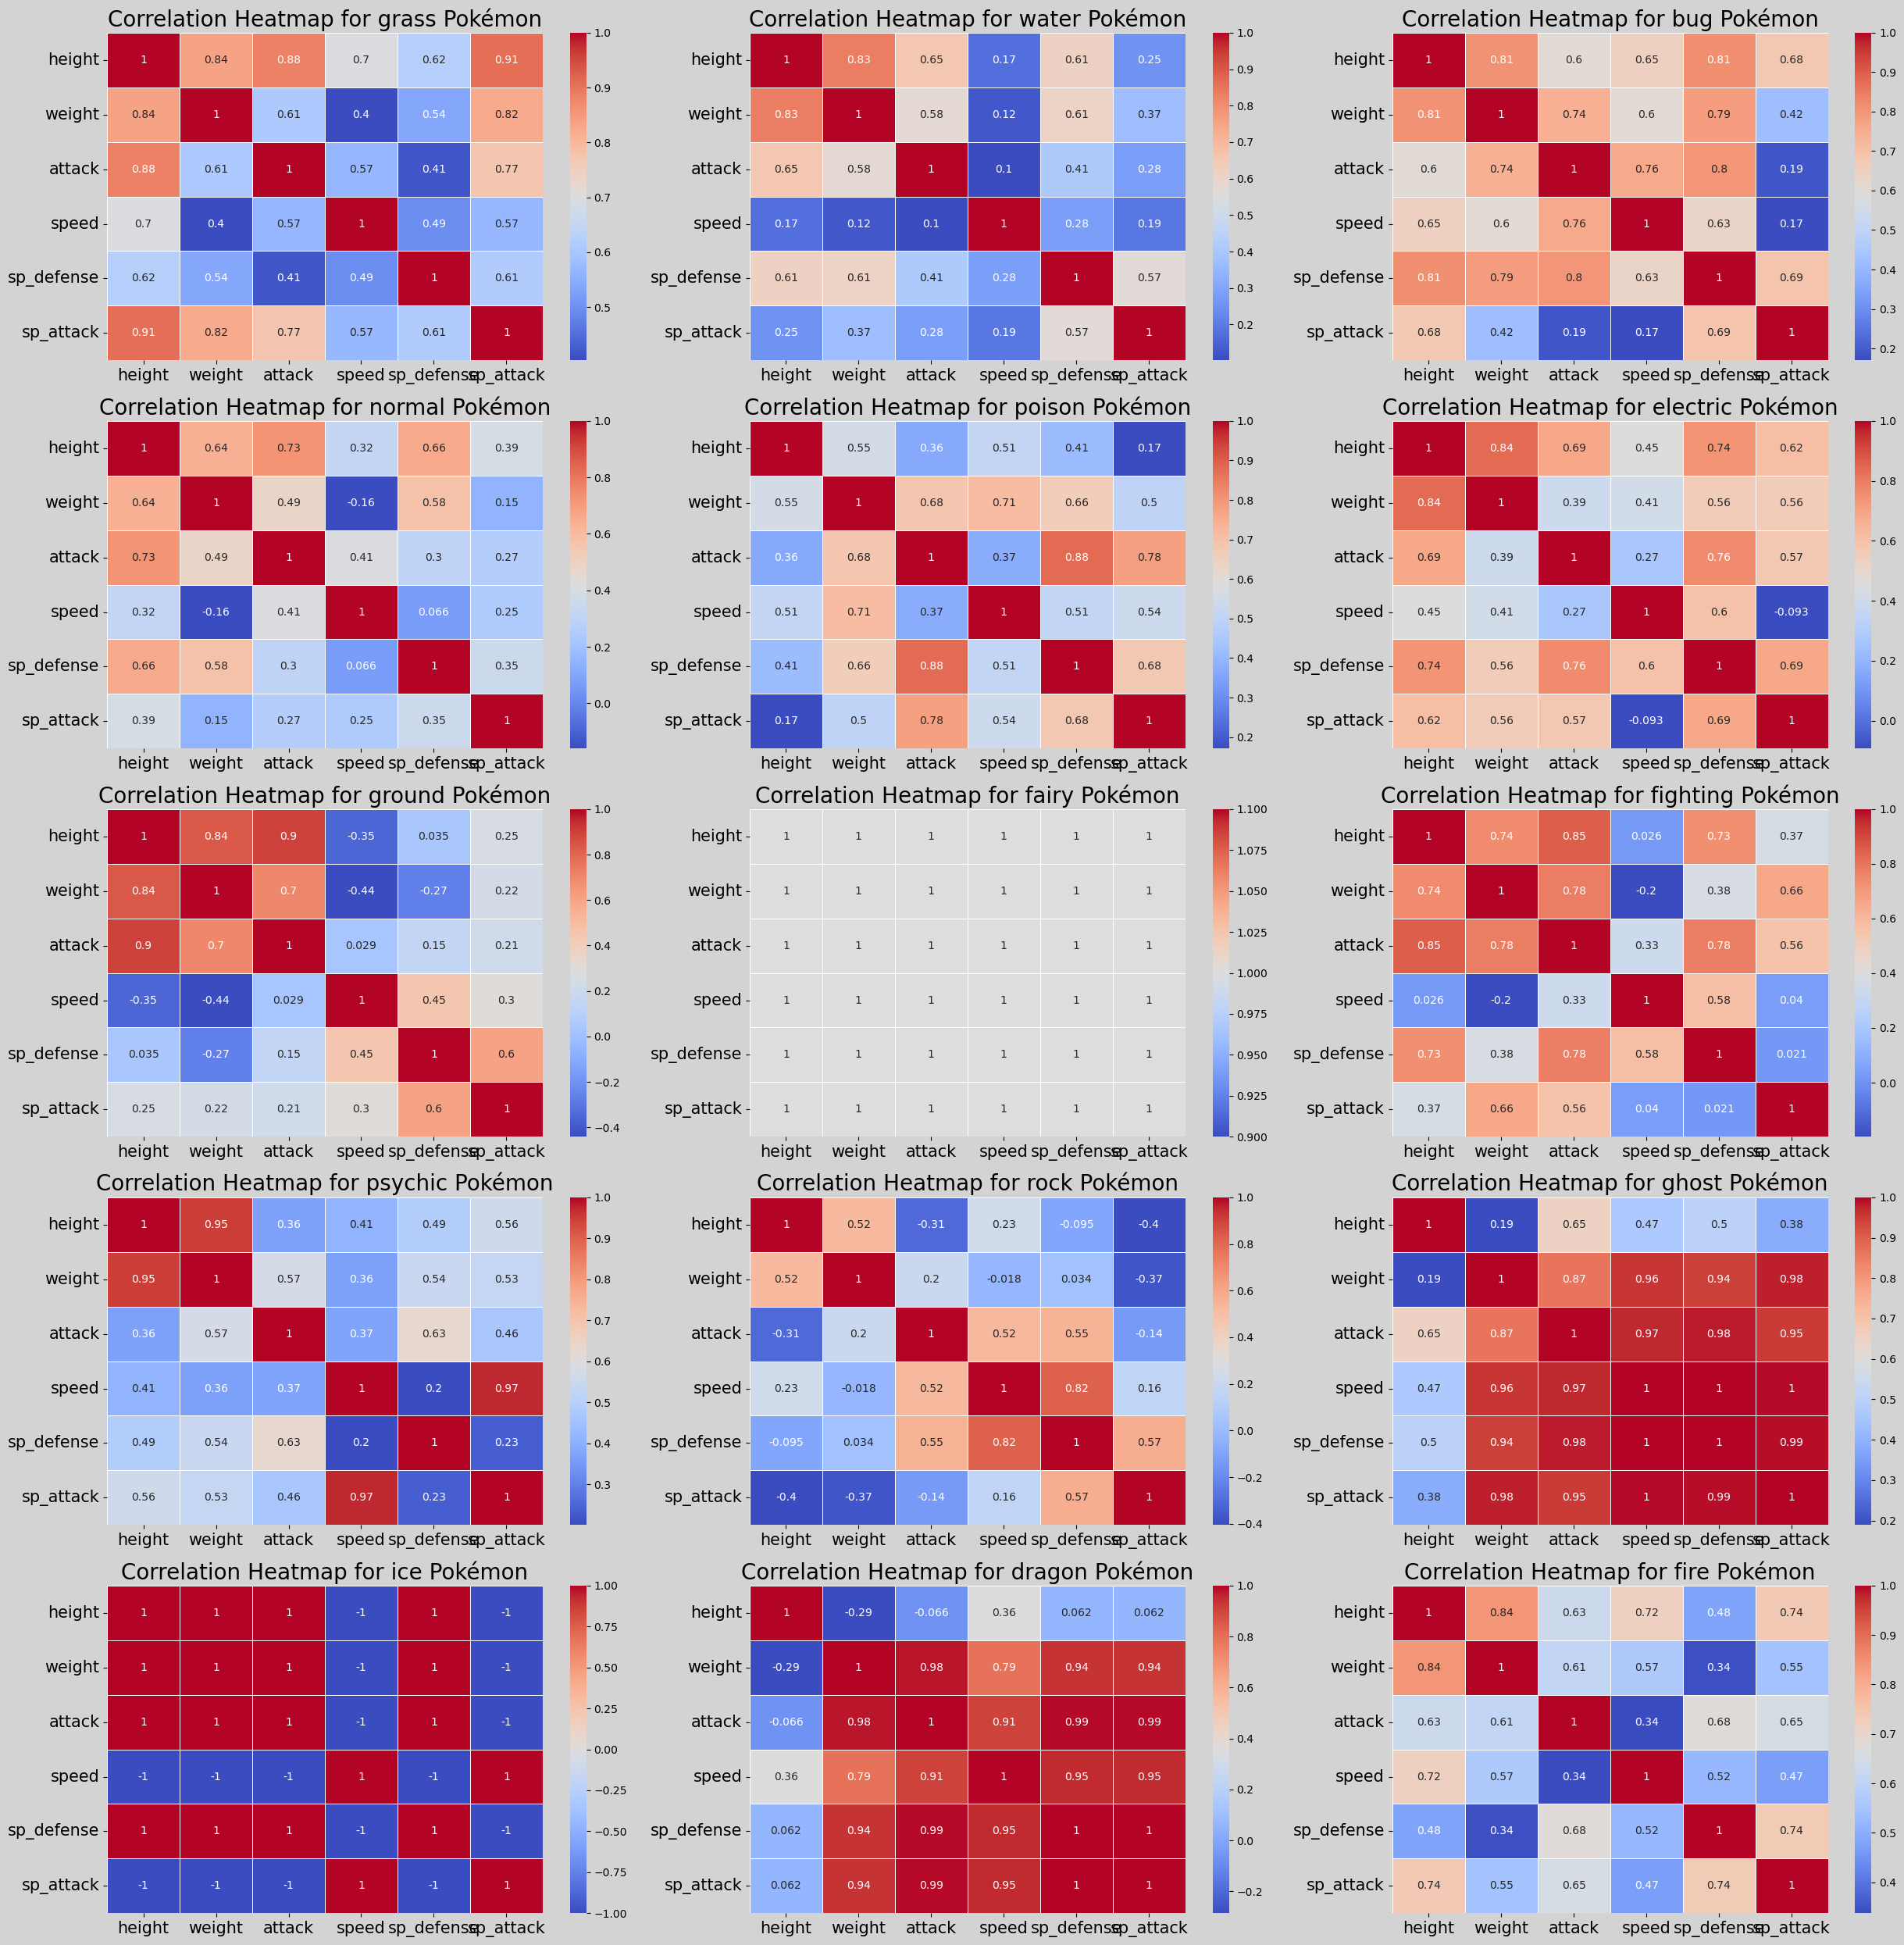

In [615]:
pokemon_types = [grass, water, bug, normal, poison, electric, ground, fairy, fighting, psychic, rock, ghost, ice, dragon, fire]
n_rows = len(pokemon_types) // 3 + (len(pokemon_types) % 3 > 0)
n_cols = min(3, len(pokemon_types))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25), facecolor='lightgrey')
G = gridspec.GridSpec(n_rows, n_cols)

for idx, pokemon_type in enumerate(pokemon_types):
    ax = plt.subplot(G[idx // n_cols, idx % n_cols])
    numeric_columns = ['height', 'weight', 'attack', 'speed', 'sp_defense', 'sp_attack']
    
    pokemon_type['height'] = pokemon_type['height'].str.extract('(\d+\.\d+)').astype(float)
    pokemon_type['weight'] = pokemon_type['weight'].str.extract('(\d+\.\d+)').astype(float)
    
    correlation_matrix = pokemon_type[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
    ax.set_title(f'Correlation Heatmap for {pokemon_type.iloc[0]["type1"]} Pokémon', fontsize=20)
    
    # Increase the font size for x-axis and y-axis tick labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

plt.tight_layout()
plt.show()


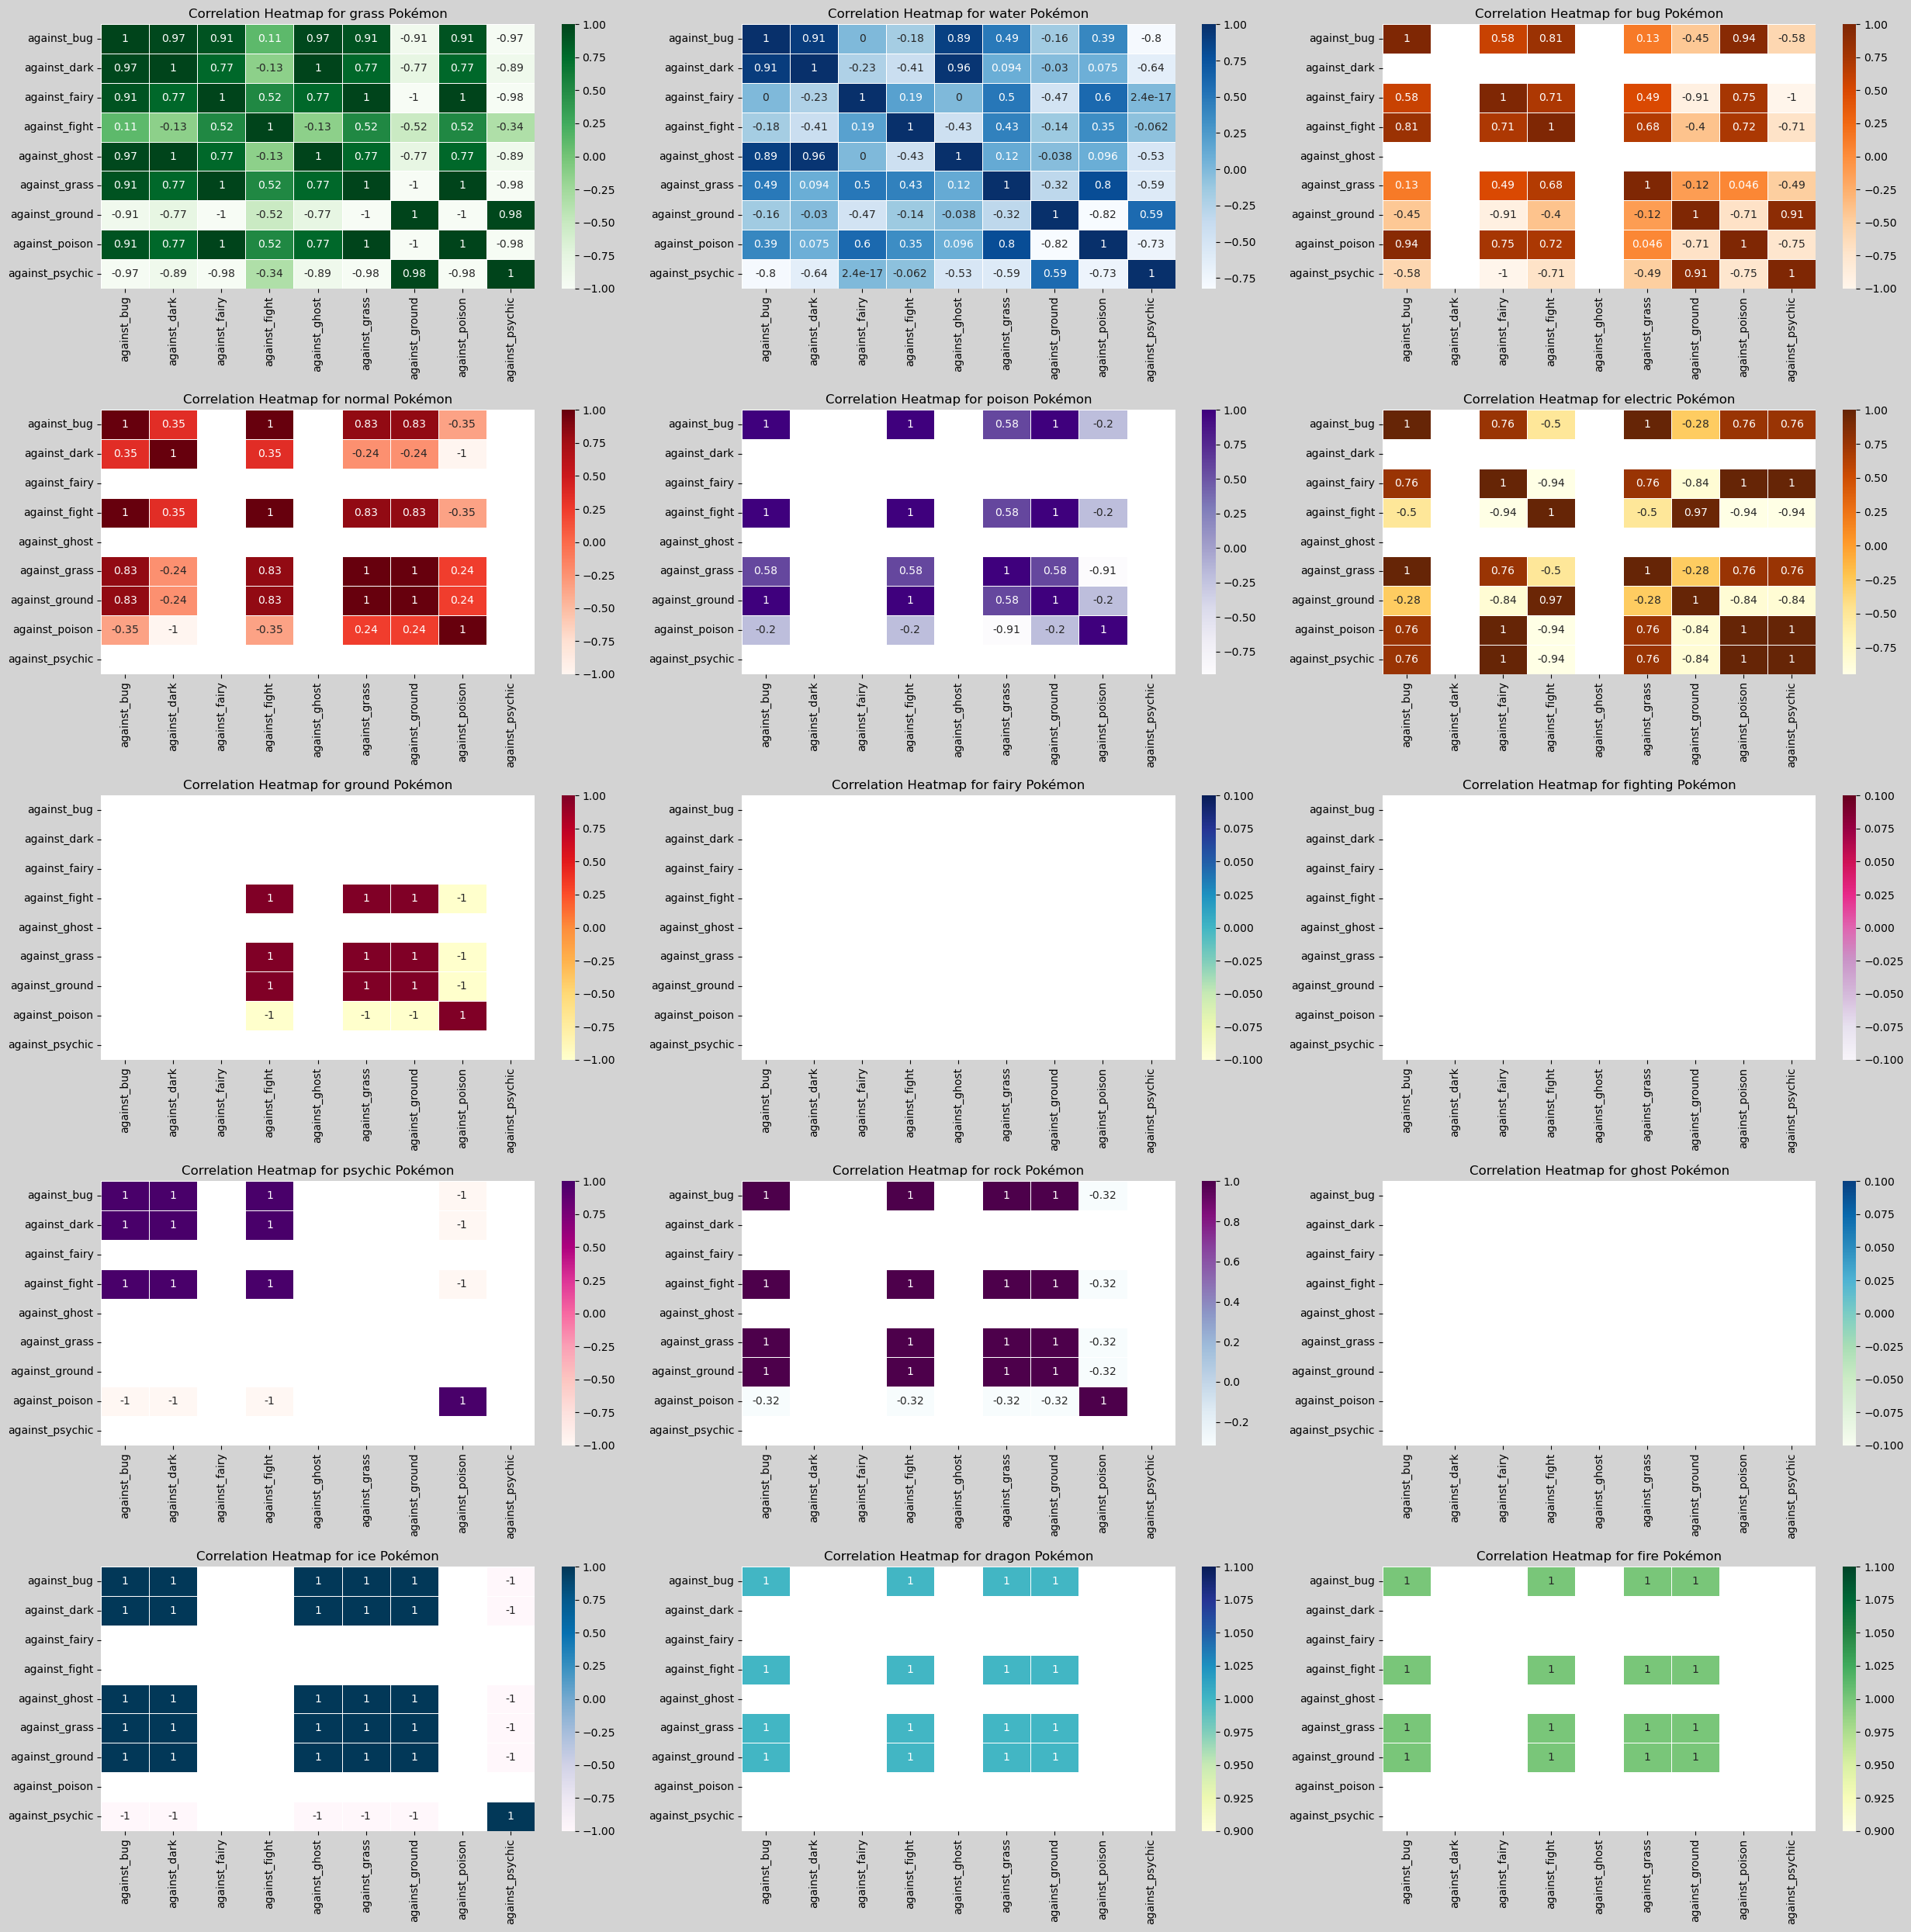

In [596]:

pokemon_types = [grass, water, bug, normal, poison, electric, ground, fairy, fighting, psychic, rock, ghost, ice, dragon, fire]
n_rows = len(pokemon_types) // 3 + (len(pokemon_types) % 3 > 0)
n_cols = min(3, len(pokemon_types))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25), facecolor='lightgrey')  # Set the facecolor here
G = gridspec.GridSpec(n_rows, n_cols)
colormaps = ['Greens', 'Blues', 'Oranges', 'Reds', 'Purples', 'YlOrBr', 'YlOrRd', 'YlGnBu', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'YlGn']

for idx, (pokemon_type, cmap) in enumerate(zip(pokemon_types, colormaps)):
    ax = plt.subplot(G[idx // n_cols, idx % n_cols])
    numeric_columns = ['against_bug', 'against_dark', 'against_fairy', 'against_fight',
                    'against_ghost', 'against_grass', 'against_ground',  'against_poison', 
                   'against_psychic']

    correlation_matrix = pokemon_type[numeric_columns].corr()

    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=.5, ax=ax)
    ax.set_title(f'Correlation Heatmap for {pokemon_type.iloc[0]["type1"]} Pokémon')

plt.tight_layout()
plt.show()


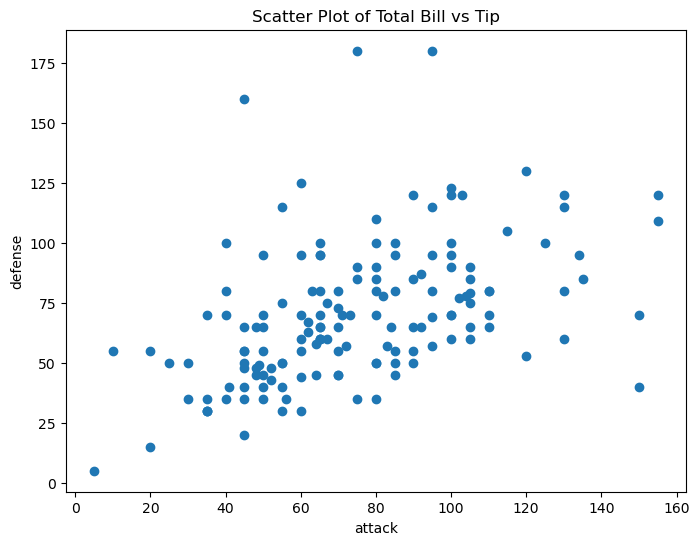

In [676]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pokemon['attack'], pokemon['defense'])
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('attack')
plt.ylabel('defense')
plt.show()

In [673]:
pokemon.columns

Index(['id_x', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution',
       'abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'hp', 'japanese_name',
       'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed',
       'type1', 'type2', 'generation', 'is_legendary', 'id_y'],
      dtype='object')

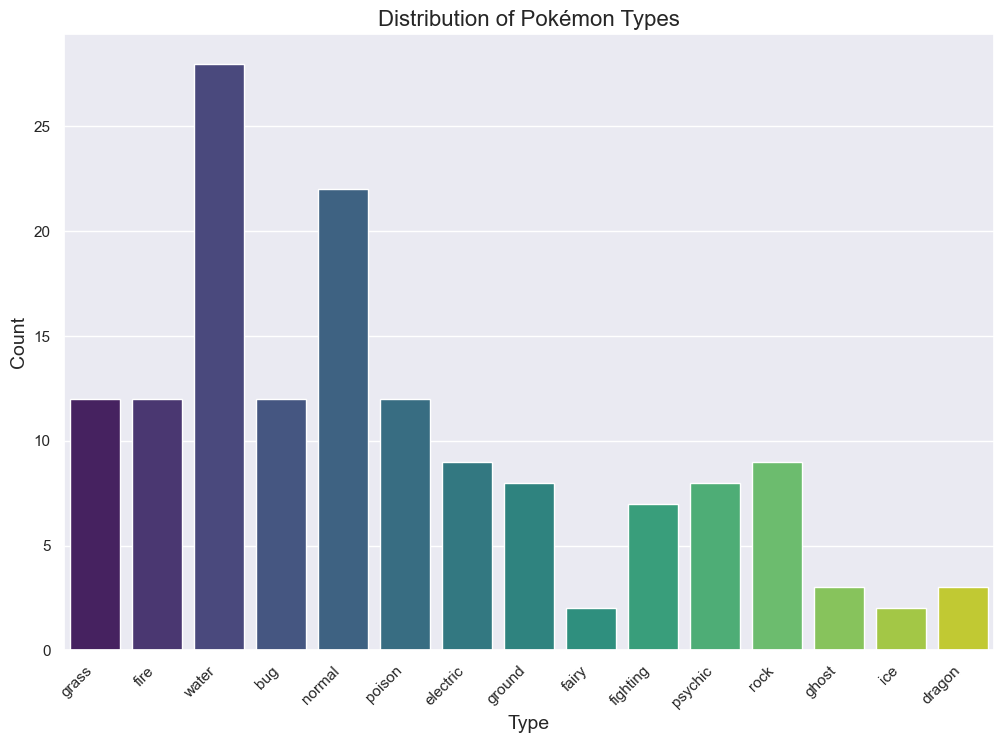

In [677]:

sns.set(style="darkgrid")  # Set the style of the plot

plt.figure(figsize=(12, 8))
sns.countplot(x='type1', data=pokemon, palette='viridis')  # Adjust 'type1' to your actual column name

plt.title('Distribution of Pokémon Types', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()


# Univareient Anaylsis With respect to the attack

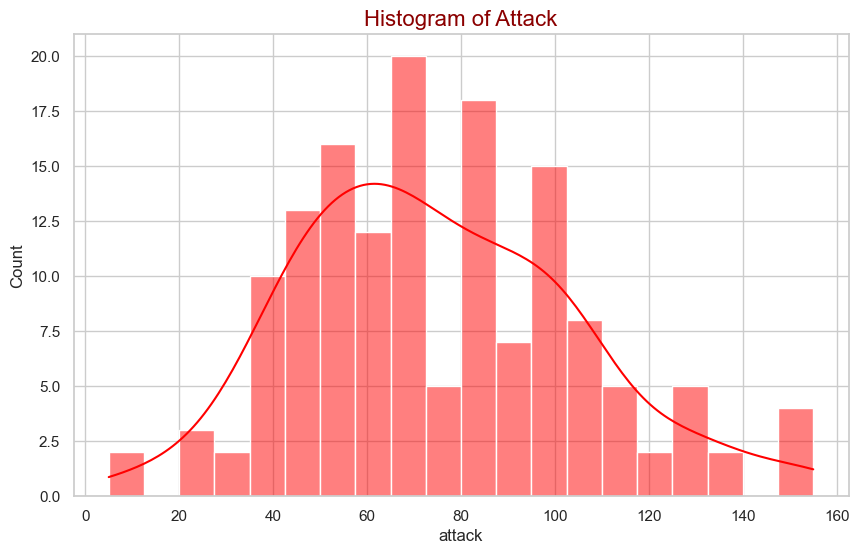

In [688]:

plt.figure(figsize=(10, 6))
sns.histplot(pokemon['attack'], bins=20, kde=True, color='red')
plt.title('Histogram of Attack', fontsize=16, color='darkred')

plt.show()


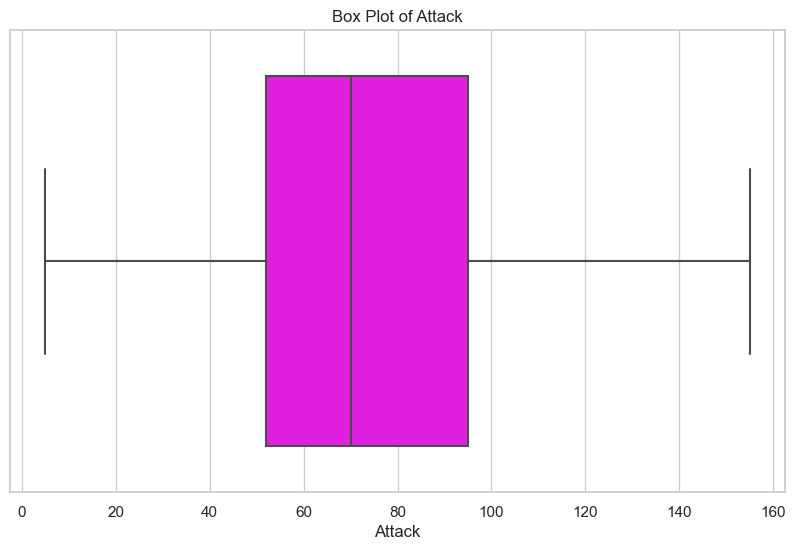

In [689]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pokemon['attack'], color='fuchsia')
plt.title('Box Plot of Attack')
plt.xlabel('Attack')
plt.show()

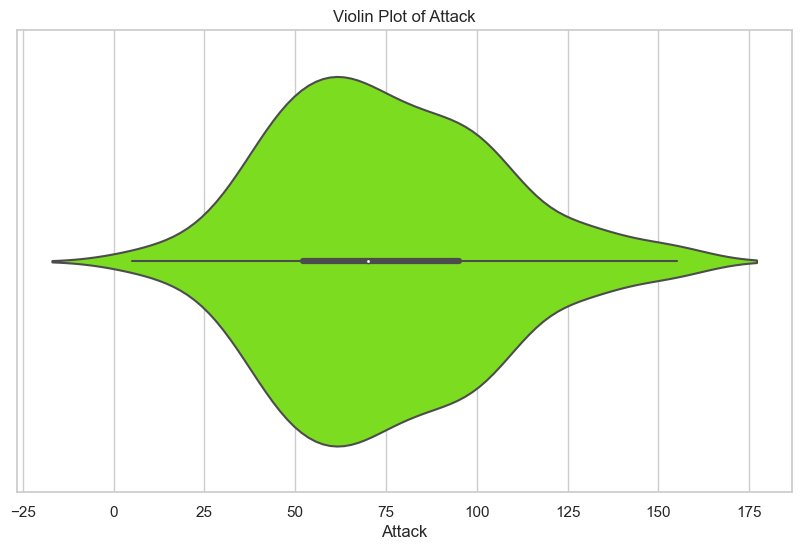

In [690]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=pokemon['attack'], color='lawngreen')
plt.title('Violin Plot of Attack')
plt.xlabel('Attack')
plt.show()

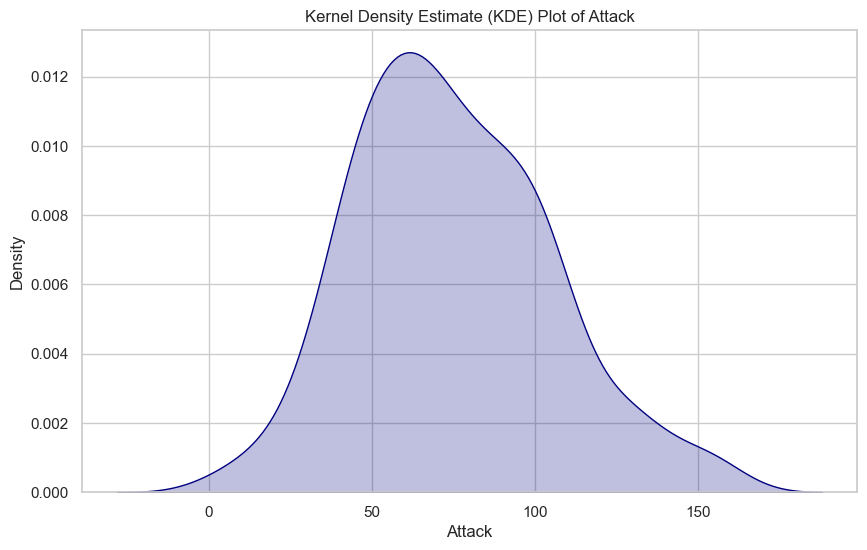

In [692]:
plt.figure(figsize=(10, 6))
sns.kdeplot(pokemon['attack'], fill=True, color='navy')
plt.title('Kernel Density Estimate (KDE) Plot of Attack')
plt.xlabel('Attack')
plt.show()

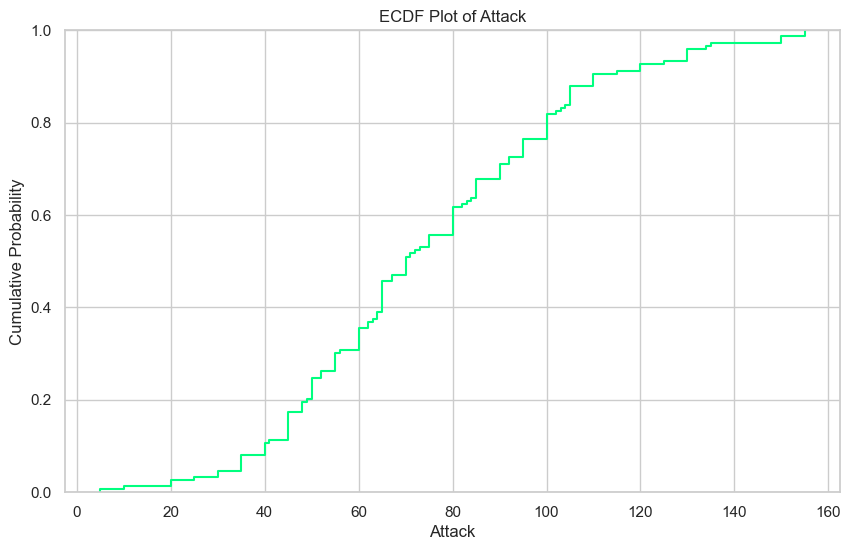

In [693]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(pokemon['attack'], color='springgreen')
plt.title('ECDF Plot of Attack')
plt.xlabel('Attack')
plt.ylabel('Cumulative Probability')
plt.show()

## bie varient

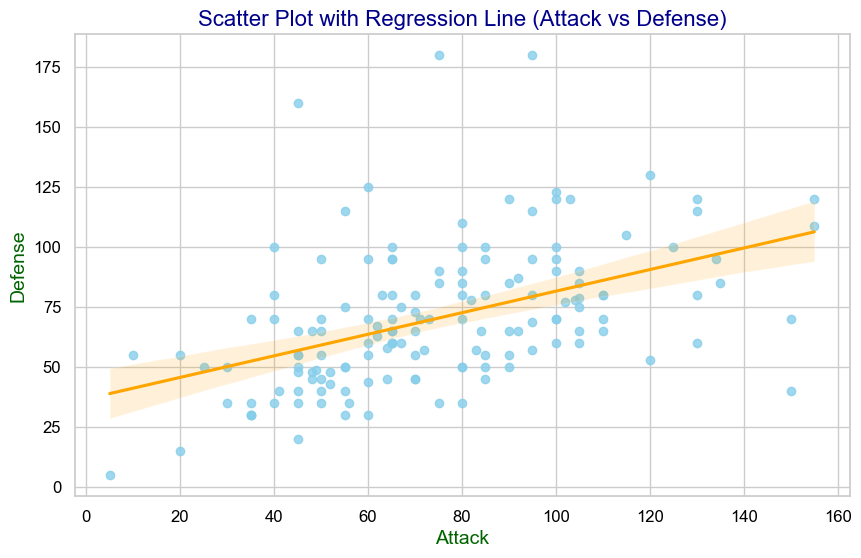

In [694]:

plt.figure(figsize=(10, 6))
sns.regplot(x=pokemon['attack'], y=pokemon['defense'], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'orange'})
plt.title('Scatter Plot with Regression Line (Attack vs Defense)', fontsize=16, color='darkblue')
plt.xlabel('Attack', fontsize=14, color='darkgreen')
plt.ylabel('Defense', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.show()


<Figure size 1200x800 with 0 Axes>

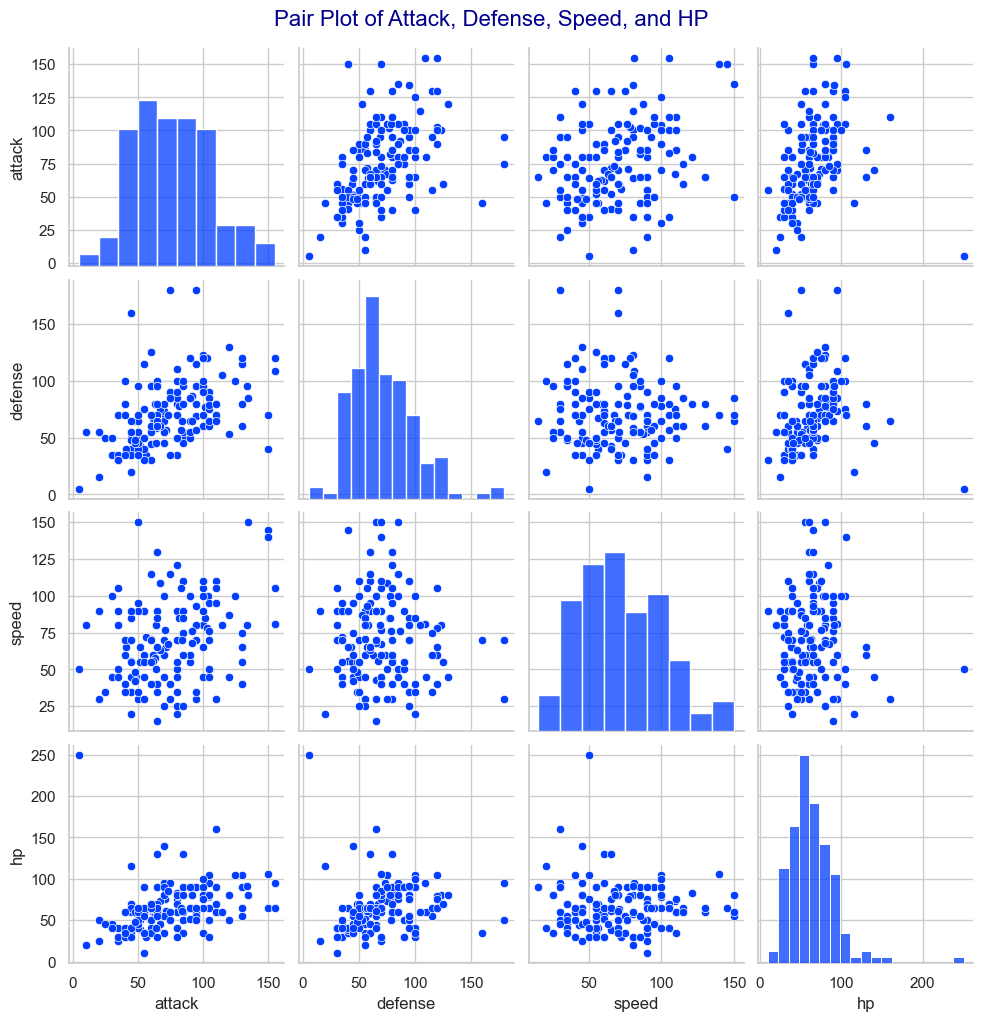

In [695]:
# Pair Plot for Multiple Variables
plt.figure(figsize=(12, 8))
sns.pairplot(pokemon[['attack', 'defense', 'speed', 'hp']], palette='husl')
plt.suptitle('Pair Plot of Attack, Defense, Speed, and HP', y=1.02, fontsize=16, color='darkblue')
plt.show()


<Figure size 1000x600 with 0 Axes>

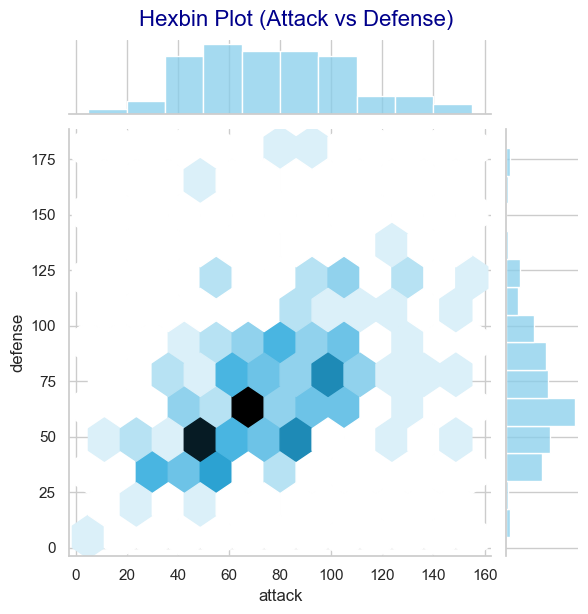

In [697]:
# Hexbin Plot using jointplot
plt.figure(figsize=(10, 6))
sns.jointplot(x=pokemon['attack'], y=pokemon['defense'], kind='hex', color='skyblue')
plt.suptitle('Hexbin Plot (Attack vs Defense)', y=1.02, fontsize=16, color='darkblue')
plt.show()


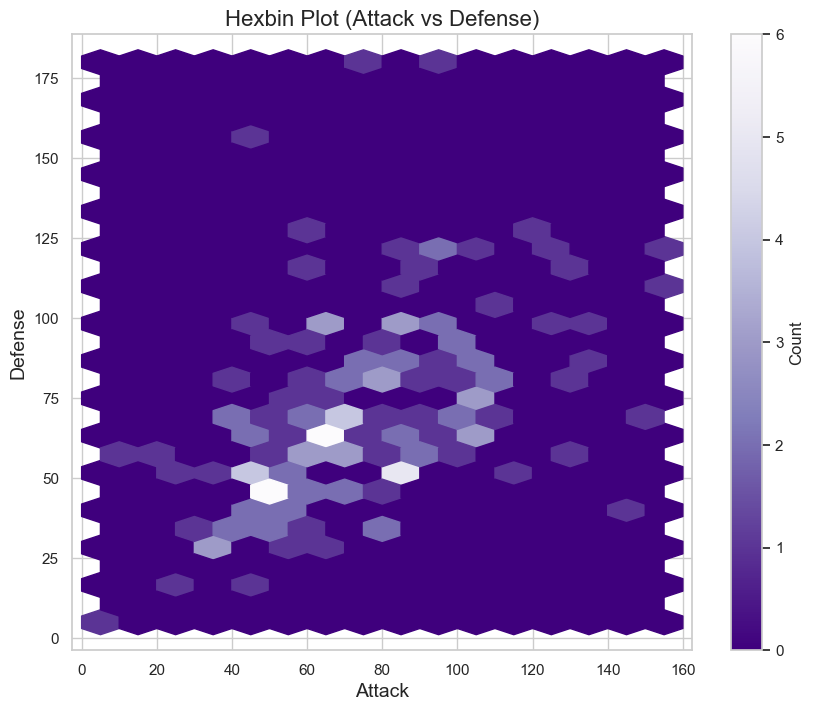

In [698]:

# Create a hexbin plot
plt.figure(figsize=(10, 8))
plt.hexbin(pokemon['attack'], pokemon['defense'], gridsize=(15, 15), cmap=plt.cm.Purples_r)
plt.colorbar(label='Count')

# Set plot title and labels
plt.title('Hexbin Plot (Attack vs Defense)', fontsize=16)
plt.xlabel('Attack', fontsize=14)
plt.ylabel('Defense', fontsize=14)

plt.show()


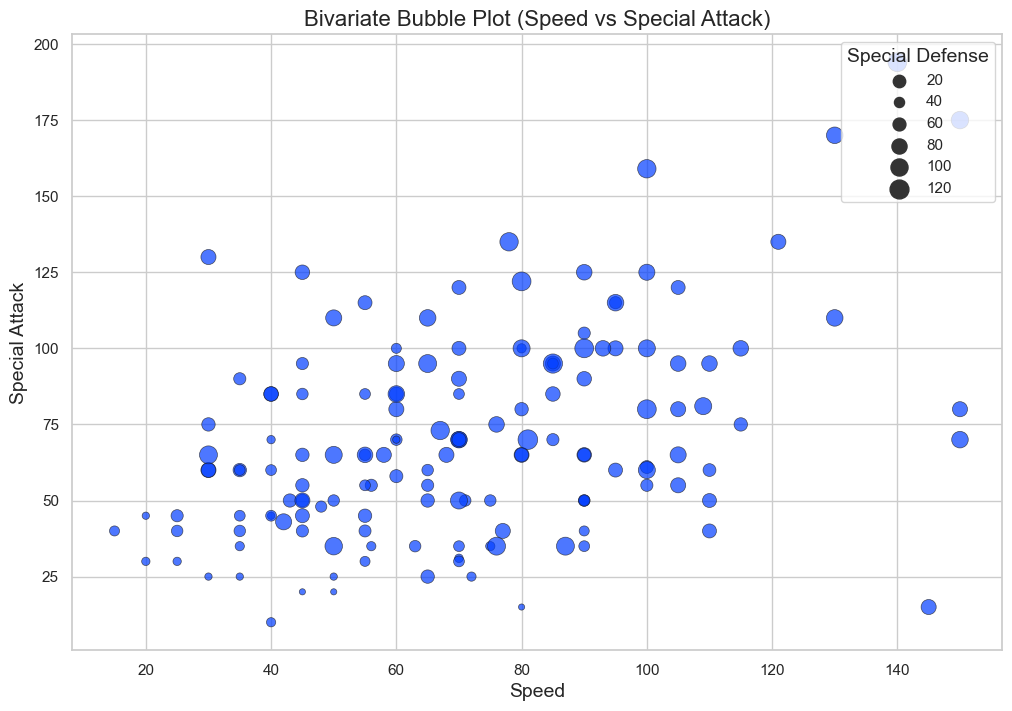

In [700]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='speed', y='sp_attack', size='sp_defense', data=pokemon, sizes=(20, 200), alpha=0.7, edgecolor='k', linewidth=0.5)

plt.title('Bivariate Bubble Plot (Speed vs Special Attack)', fontsize=16)
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Special Attack', fontsize=14)

legend = plt.legend(title='Special Defense', title_fontsize='14', loc='upper right')
legend.legendHandles[0]._sizes = [80]

plt.show()
